In [14]:
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Reshape, Layer, Activation
from keras.initializers import RandomUniform, Initializer, Constant
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt
# from keras.layers import Dense, Activation
# from keras.layers import Activation
# from keras.optimizers import RMSprop
from sklearn.metrics import r2_score, median_absolute_error,mean_squared_error
from math import sqrt

In [15]:
PATH_TO_DB = r'D:\Projects\БММ\platelets'

Классы

In [16]:
df_th = pd.read_csv(join(PATH_TO_DB,'BD_platelets_regular.csv'), sep=';')
df_th

,r,eps,n,beta,0,0.5,1,1.5,2,2.5,...,85.5,86,86.5,87,87.5,88,88.5,89,89.5,90
0,0.5,0.1,1.3725,40,25.301178,25.209944,24.938040,24.490799,23.876934,23.108286,...,0.035687,0.040932,0.046830,0.053408,0.060684,0.068672,0.077375,0.086786,0.096886,0.107647
1,0.5,0.1,1.3725,42,25.253750,25.164614,24.898931,24.461840,23.861731,23.110008,...,0.110150,0.120814,0.131986,0.143610,0.155616,0.167922,0.180437,0.193053,0.205656,0.218120
2,0.5,0.1,1.3725,44,25.202293,25.115267,24.855852,24.428991,23.842764,23.108150,...,0.219127,0.230691,0.241920,0.252689,0.262871,0.272336,0.280954,0.288599,0.295148,0.300487
3,0.5,0.1,1.3725,46,25.143423,25.058531,24.805452,24.388945,23.816780,23.099533,...,0.305602,0.309963,0.313069,0.314847,0.315234,0.314183,0.311665,0.307667,0.302198,0.295287
4,0.5,0.1,1.3725,48,25.076042,24.993305,24.746632,24.340595,23.782681,23.083057,...,0.312300,0.304946,0.296285,0.286385,0.275334,0.263235,0.250206,0.236381,0.221905,0.206933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196139,2.1,1.0,1.3875,82,214711.812500,212251.640600,205016.031300,193427.546900,178150.890600,160037.921900,...,1.374523,1.331677,1.215894,1.043869,0.838637,0.626118,0.431531,0.276193,0.175054,0.135262
196140,2.1,1.0,1.3875,84,214710.484400,212250.328100,205014.765600,193426.375000,178149.843800,160037.015600,...,1.377804,1.336296,1.221435,1.049784,0.844330,0.631035,0.435245,0.278462,0.175858,0.134800
196141,2.1,1.0,1.3875,86,214710.375000,212250.218800,205014.671900,193426.281300,178149.765600,160036.968800,...,1.384726,1.344976,1.231294,1.060079,0.854240,0.639758,0.442089,0.282927,0.177689,0.134010
196142,2.1,1.0,1.3875,88,214711.218800,212251.046900,205015.484400,193427.046900,178150.500000,160037.640600,...,1.388198,1.349743,1.237083,1.066495,0.860799,0.645923,0.447320,0.286726,0.179647,0.133848


In [17]:
columns_to_keep = ['r', 'eps', 'n', 'beta'] + [str(column) for column in range(10, 70)]
df_th = df_th[columns_to_keep]

In [18]:
X = df_th.iloc[:, 4:]

In [19]:
y = df_th[['r', 'eps', 'n', 'beta']]
# y = df_th[['n']]

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
Xvse_scaled = scaler_X.fit_transform(X)

# # Создание экземпляра MinMaxScaler для нормализации y
scaler_y = MinMaxScaler()
y_scaled= scaler_y.fit_transform(y)

In [21]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [22]:
X_train, X_test, y_train, y_test = train_test_split(Xvse_scaled , y_scaled, test_size=0.25, shuffle=True)
# X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25, shuffle=True)

In [23]:
len(y_train[0])

4

In [24]:
# Весовая функция
def weight_formula(to_weight, θ):
    return to_weight*((1/θ)*np.exp(-2*(np.log(θ/54))**2))

θ = [str(column) for column in range(10, 70)]
θ = list(map(float, θ))
vectorized = np.vectorize(weight_formula)

In [13]:
# Применение функции к массивам
X_train_weighted = np.array(vectorized(X_train, θ))
X_test_weighted = np.array(vectorized(X_test, θ))

In [27]:
def create_deep_dense_ae():
    # Размерность кодированного представления
    encoding_dim = 512
    input_dim = 60

    # Энкодер
    input = Input(shape=(input_dim,))
    # flat_img = Flatten()(input_img)
    x = Dense(60, activation='relu')(input)
    x = Dense(120, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='linear')(x)

    # Декодер
    input_encoded = Input(shape=(encoding_dim,))
    x = Dense(256, activation='relu')(input_encoded)
    x = Dense(120, activation='relu')(x)
    x = Dense(60, activation='relu')(x)
    decoded = Dense(input_dim, activation='sigmoid')(x)
    # decoded = Reshape((28, 28, 1))(flat_decoded)

    # Модели
    encoder = Model(input, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input, decoder(encoder(input)), name="autoencoder")
    return encoder, decoder, autoencoder

d_encoder, d_decoder, d_autoencoder = create_deep_dense_ae()
d_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [28]:
d_encoder, d_decoder, d_autoencoder = create_deep_dense_ae()
d_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [29]:
d_autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 60)]              0         
                                                                 
 encoder (Functional)        (None, 512)               173540    
                                                                 
 decoder (Functional)        (None, 60)                173088    
                                                                 
Total params: 346628 (1.32 MB)
Trainable params: 346628 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
d_autoencoder.fit(X_train, X_train,
                  epochs=150,
                  batch_size=256,
                  shuffle=True,
                  validation_data=(X_test, X_test))

Epoch 1/150
575/575 [==============================] - 4s 5ms/step - loss: 0.1577 - val_loss: 0.1385
Epoch 2/150
575/575 [==============================] - 3s 4ms/step - loss: 0.1381 - val_loss: 0.1381
Epoch 3/150
575/575 [==============================] - 3s 5ms/step - loss: 0.1379 - val_loss: 0.1380
Epoch 4/150
575/575 [==============================] - 3s 5ms/step - loss: 0.1378 - val_loss: 0.1379
Epoch 5/150
575/575 [==============================] - 3s 5ms/step - loss: 0.1377 - val_loss: 0.1378
Epoch 6/150
575/575 [==============================] - 3s 4ms/step - loss: 0.1376 - val_loss: 0.1378
Epoch 7/150
575/575 [==============================] - 3s 5ms/step - loss: 0.1376 - val_loss: 0.1377
Epoch 8/150
575/575 [==============================] - 3s 5ms/step - loss: 0.1375 - val_loss: 0.1377
Epoch 9/150
575/575 [==============================] - 3s 5ms/step - loss: 0.1375 - val_loss: 0.1376
Epoch 10/150
575/575 [==============================] - 3s 5ms/step - loss: 0.1375 - val_lo

In [31]:
preds = d_autoencoder.predict(X_test)

1533/1533 [==============================] - 1s 916us/step


In [32]:
print(
f'r2 = {r2_score(X_test, preds):.3f}', f'MedAE = {median_absolute_error(X_test, preds):.3f}',
f'MSE = {mean_squared_error(X_test, preds):.3f}',sep='\n')

r2 = 0.999
MedAE = 0.000
MSE = 0.000


In [33]:
preds_test_encoded = d_encoder(X_test)
preds_train_encoded = d_encoder(X_train)
print(preds_test_encoded[0])

tf.Tensor(
[-1.63499340e-02 -3.04481536e-02 -2.37511657e-02  7.99709931e-04
 -8.06488097e-04  1.20482333e-02 -4.01978284e-01 -3.77429649e-03
 -2.46853791e-02 -3.75700369e-03 -1.08016655e-03  2.29874253e-02
  1.01733133e-02 -1.97861791e-02  1.06913038e-02  1.56380348e-02
 -6.02271184e-02  5.73781207e-02 -3.72220054e-02 -2.80103646e-03
 -3.24899793e-01 -2.08031014e-02 -1.85997449e-02  3.23988125e-03
 -3.70565504e-02 -1.53368246e-02 -5.57534397e-03  4.22817916e-02
 -2.46434137e-02 -1.93147793e-01 -1.37086585e-03  7.75133818e-02
  9.28039104e-03  1.72103941e-03 -4.13599424e-03  1.22935399e-02
 -1.13199186e-02 -2.07331404e-03  1.87179111e-02  1.54988831e-02
  3.58417667e-02  2.99436487e-02  3.26383054e-01 -1.21832006e-02
 -1.60143301e-02  1.31246746e-02  2.78016329e-02 -3.14239413e-03
 -3.18412818e-02 -3.73440497e-02  5.55019751e-02  5.52899390e-02
 -9.76363197e-03  5.51161543e-03 -1.35078818e-01  2.07990427e-02
  2.98482589e-02 -1.79474317e-02  2.66977549e-02  5.64167835e-03
 -5.37830684e-

In [34]:
with tf.device('/gpu:0'):
  model = Sequential()
  # model.add(rbflayer)
  model.add(Dense(256,
                    input_shape=(512,)))
  model.add(Dense(128))
  model.add(Dense(128))
  model.add(Dense(32))
  model.add(Dense(4))
  model.add(Activation('relu'))

In [35]:
model.compile(loss='mse',
                  optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine_proximity'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 256)               131328    
                                                                 
 dense_37 (Dense)            (None, 128)               32896     
                                                                 
 dense_38 (Dense)            (None, 128)               16512     
                                                                 
 dense_39 (Dense)            (None, 32)                4128      
                                                                 
 dense_40 (Dense)            (None, 4)                 132       
                                                                 
 activation (Activation)     (None, 4)                 0         
                                                                 
Total params: 184996 (722.64 KB)
Trainable params: 18499

In [38]:
with tf.device('/gpu:0'):
  history = model.fit(x=preds_train_encoded, y=y_train, batch_size=64, epochs=100, validation_data=(preds_test_encoded, y_test))

Epoch 1/100
2299/2299 [==============================] - 5s 2ms/step - loss: 0.0333 - mse: 0.0333 - mae: 0.1220 - mape: 24603602.0000 - cosine_proximity: 0.9413 - val_loss: 0.0334 - val_mse: 0.0334 - val_mae: 0.1220 - val_mape: 21822804.0000 - val_cosine_proximity: 0.9434
Epoch 2/100
2299/2299 [==============================] - 5s 2ms/step - loss: 0.0332 - mse: 0.0332 - mae: 0.1218 - mape: 24565350.0000 - cosine_proximity: 0.9414 - val_loss: 0.0334 - val_mse: 0.0334 - val_mae: 0.1221 - val_mape: 27417742.0000 - val_cosine_proximity: 0.9396
Epoch 3/100
2299/2299 [==============================] - 5s 2ms/step - loss: 0.0332 - mse: 0.0332 - mae: 0.1218 - mape: 24576898.0000 - cosine_proximity: 0.9414 - val_loss: 0.0332 - val_mse: 0.0332 - val_mae: 0.1208 - val_mape: 22105306.0000 - val_cosine_proximity: 0.9433
Epoch 4/100
2299/2299 [==============================] - 5s 2ms/step - loss: 0.0331 - mse: 0.0331 - mae: 0.1215 - mape: 24501734.0000 - cosine_proximity: 0.9416 - val_loss: 0.0336 -

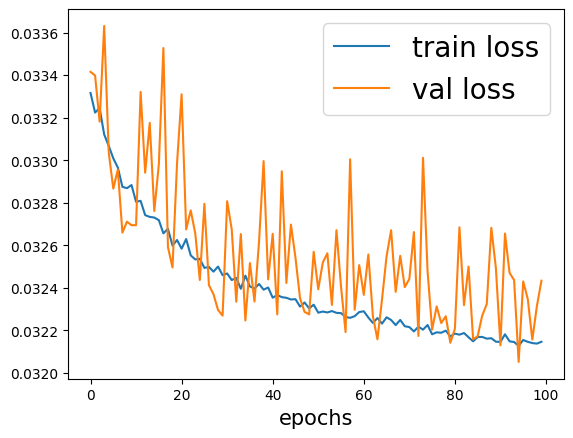

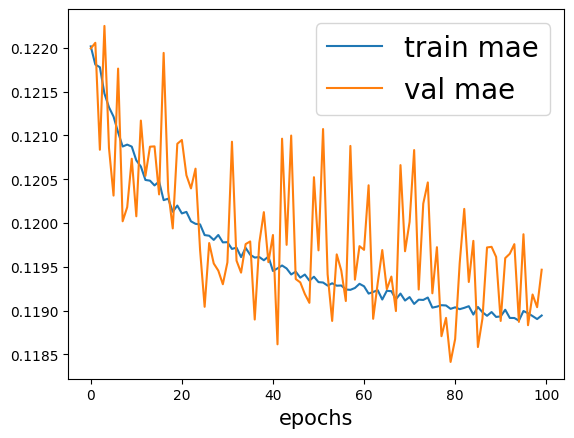

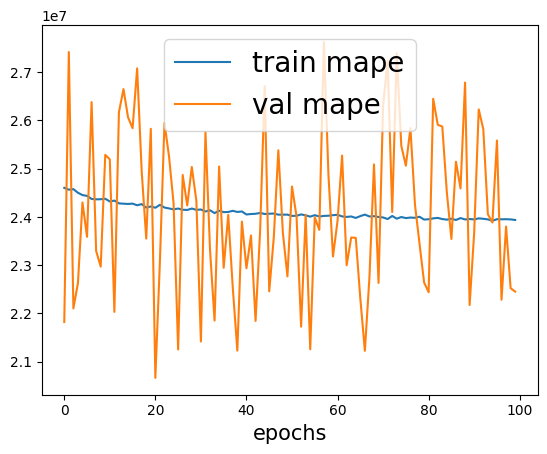

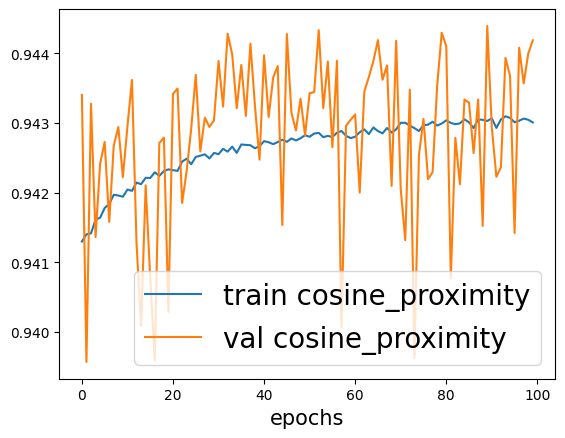

In [39]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('epochs', fontsize=15)
plt.legend(fontsize=20)
plt.show()

plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel('epochs', fontsize=15)
plt.legend(fontsize=20)
plt.show()

plt.plot(history.history['mape'], label='train mape')
plt.plot(history.history['val_mape'], label='val mape')
plt.xlabel('epochs', fontsize=15)
plt.legend(fontsize=20)
plt.show()

plt.plot(history.history['cosine_proximity'], label='train cosine_proximity')
plt.plot(history.history['val_cosine_proximity'], label='val cosine_proximity')
plt.xlabel('epochs', fontsize=15)
plt.legend(fontsize=20)
plt.show()

In [42]:
import timeit
start_time = timeit.default_timer()
preds = model.predict(preds_test_encoded)
time_1 = timeit.default_timer() - start_time
print("Общее время: " + str(time_1) + " мс")
print("Время на частицу: " + str(time_1/len(X_test)*1000) + " мс")

1533/1533 [==============================] - 1s 762us/step
Общее время: 1.4555379999999332 мс
Время на частицу: 0.02968304918835005 мс


In [43]:
y_test_r = y_test[:, 0]
preds_r = preds[:, 0]

y_test_eps = y_test[:, 1]
preds_eps = preds[:, 1]

y_test_n = y_test[:, 2]
preds_n = preds[:, 2]

y_test_beta = y_test[:, 3]
preds_beta = preds[:, 3]

In [44]:
# Общие метрики

print(
f'r2 = {r2_score(y_test, preds):.3f} MedAE = {median_absolute_error(y_test, preds):.3f}',
f'r2 = {r2_score(y_test, preds):.3f} MSE = {mean_squared_error(y_test, preds):.3f}',sep='\n')

r2 = 0.736 MedAE = 0.100
r2 = 0.736 MSE = 0.032


In [50]:
print('r')
print(
f'r2 = {r2_score(y_test_r, preds_r):.3f} MedAE = {median_absolute_error(y_test_r, preds_r):.3f}',
f'r2 = {r2_score(y_test_r, preds_r):.3f} MSE = {mean_squared_error(y_test_r, preds_r):.3f}',sep='\n')

r
r2 = 0.872 MedAE = 0.060
r2 = 0.872 MSE = 0.011


In [49]:
print('eps')
print(
f'r2 = {r2_score(y_test_eps, preds_eps):.3f} MedAE = {median_absolute_error(y_test_eps, preds_eps):.3f}',
f'r2 = {r2_score(y_test_eps, preds_eps):.3f} MSE = {mean_squared_error(y_test_eps, preds_eps):.3f}',sep='\n')

eps
r2 = 0.934 MedAE = 0.047
r2 = 0.934 MSE = 0.006


In [47]:
print('n')
print(
f'r2 = {r2_score(y_test_n, preds_n):.3f} MedAE = {median_absolute_error(y_test_n, preds_n):.3f}',
f'r2 = {r2_score(y_test_n, preds_n):.3f} MSE = {mean_squared_error(y_test_n, preds_n):.3f}',sep='\n')

n
r2 = 0.284 MedAE = 0.233
r2 = 0.284 MSE = 0.100


In [51]:
print('beta')
print(
f'r2 = {r2_score(y_test_beta, preds_beta):.3f} MedAE = {median_absolute_error(y_test_beta, preds_beta):.3f}',
f'r2 = {r2_score(y_test_beta, preds_beta):.3f} MSE = {mean_squared_error(y_test_beta, preds_beta):.3f}',sep='\n')

beta
r2 = 0.855 MedAE = 0.058
r2 = 0.855 MSE = 0.013


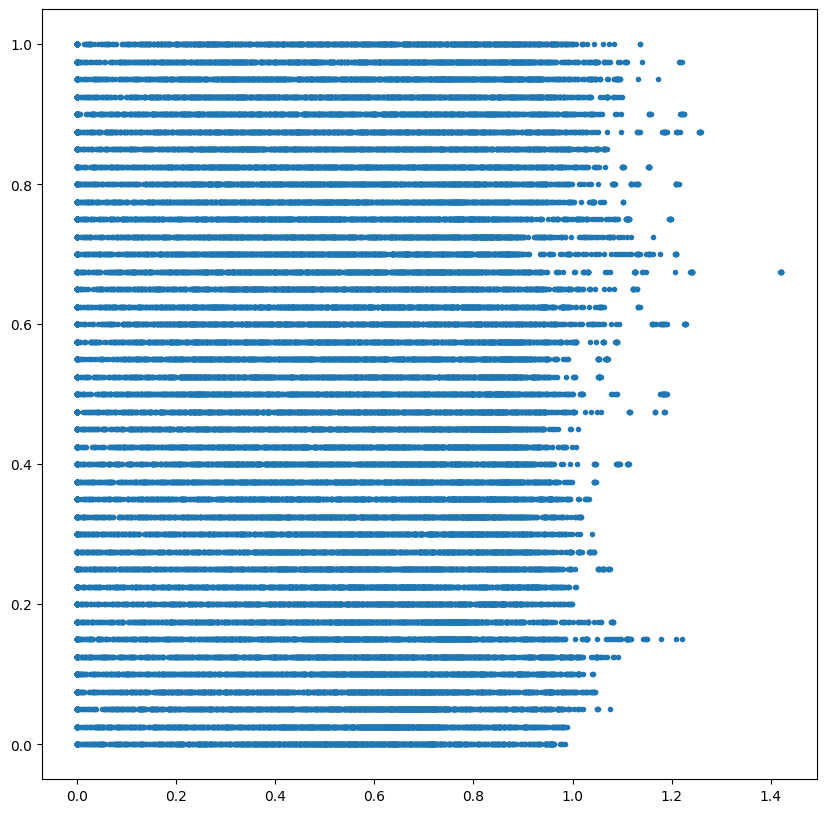

In [54]:
plt.figure(figsize=(10, 10))
plt.plot(preds[:, 1], y_test[:,0], '.')

In [55]:
def predict_regr_plot(y_test, y_pred, params, sup_title):
    N = len(params)

    plt.figure(figsize=(40, 10))
    #plt.suptitle(sup_title)
    for i in range(N):
        # for j in range(N):
            # if i == j:
            plt.subplot(1, N, i + 1)
            plt.title(str(params[i]), fontsize=30)
            plt.xlabel(str(params[i]) + ' Тестовые')
            plt.ylabel(str(params[i]) + ' Предсказанные')

            plt.plot(y_test[:, i], y_pred[:, i], '*')

                #plt.legend()
            # else:
            #     plt.subplot(N, N, i * N + j + 1)
            #     plt.title("Сравнительная карта параметров")
            #     plt.xlabel(params[i])
            #     plt.ylabel(params[j])

            #     plt.plot(y_test[:, i], y_test[:, j], '*', label="Тест")
            #     plt.plot(y_pred[:, i], y_pred[:, j], '.', label="Предсказание")
            #     plt.legend()
    plt.show()

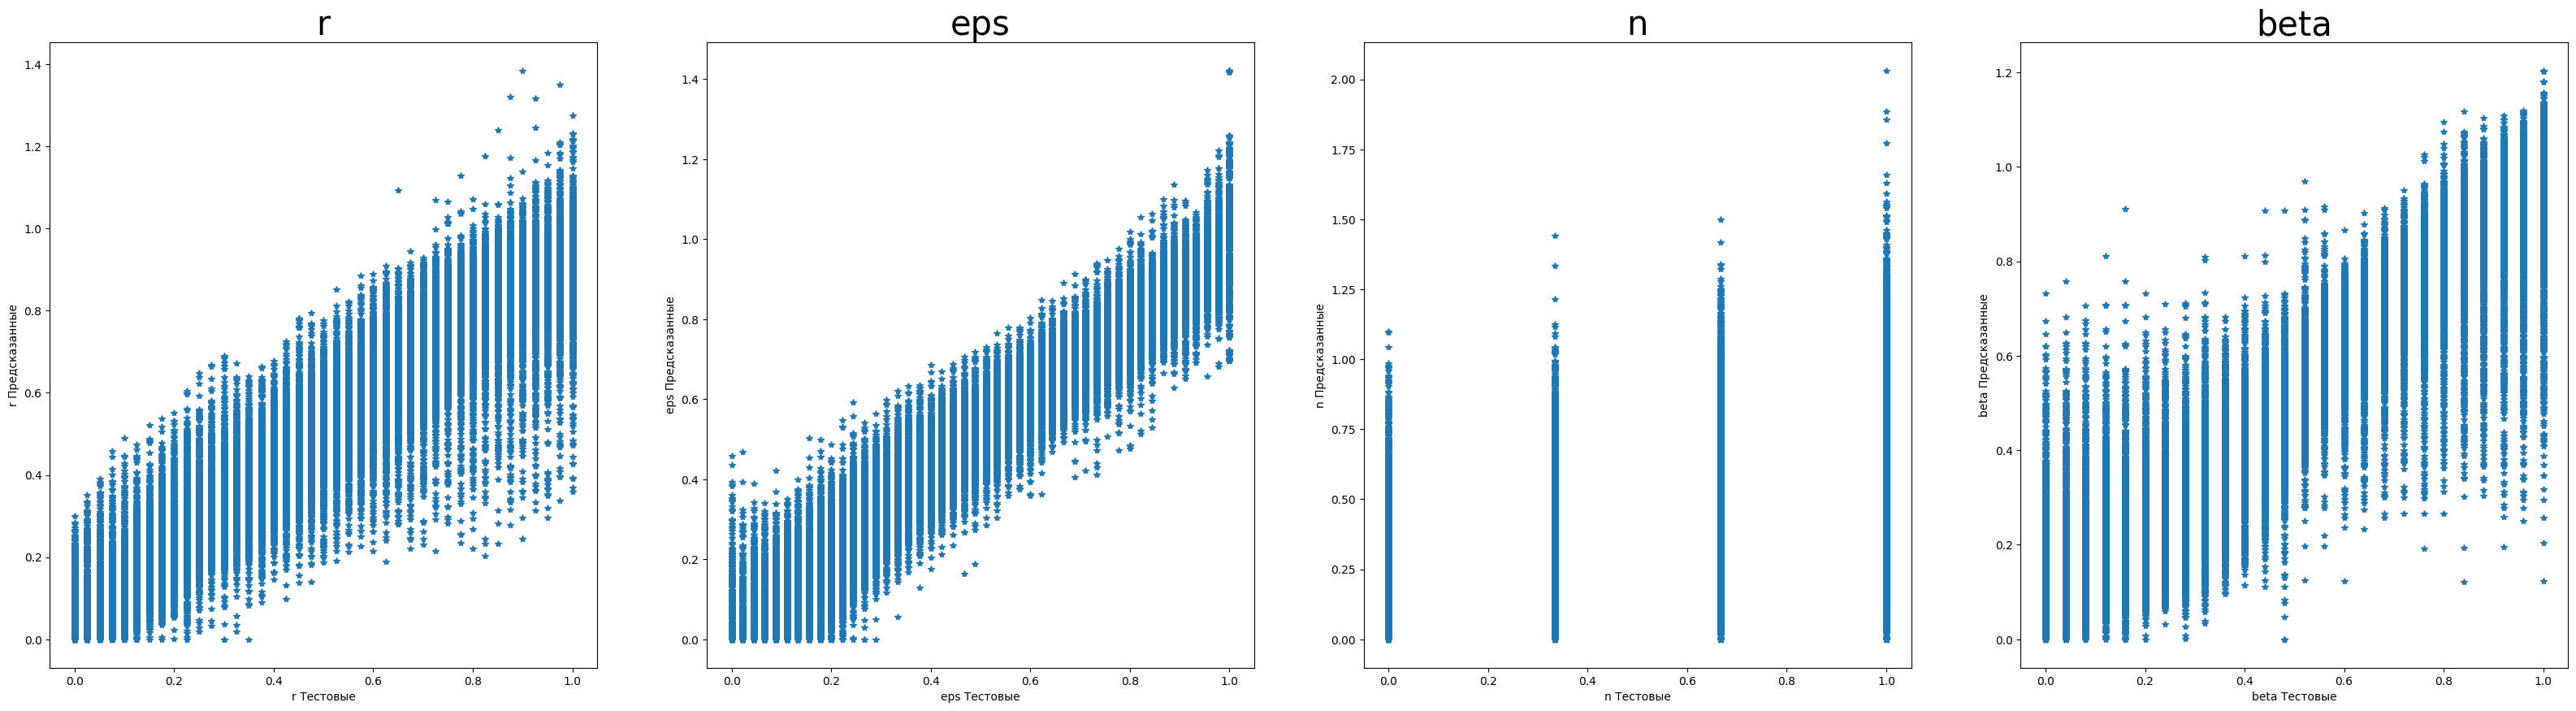

In [56]:
predict_regr_plot(y_test, preds, ['r', 'eps', 'n', 'beta'], '')

In [60]:
Y_unscaled = scaler_y.inverse_transform(y_test)
preds_unscaled = scaler_y.inverse_transform(preds)

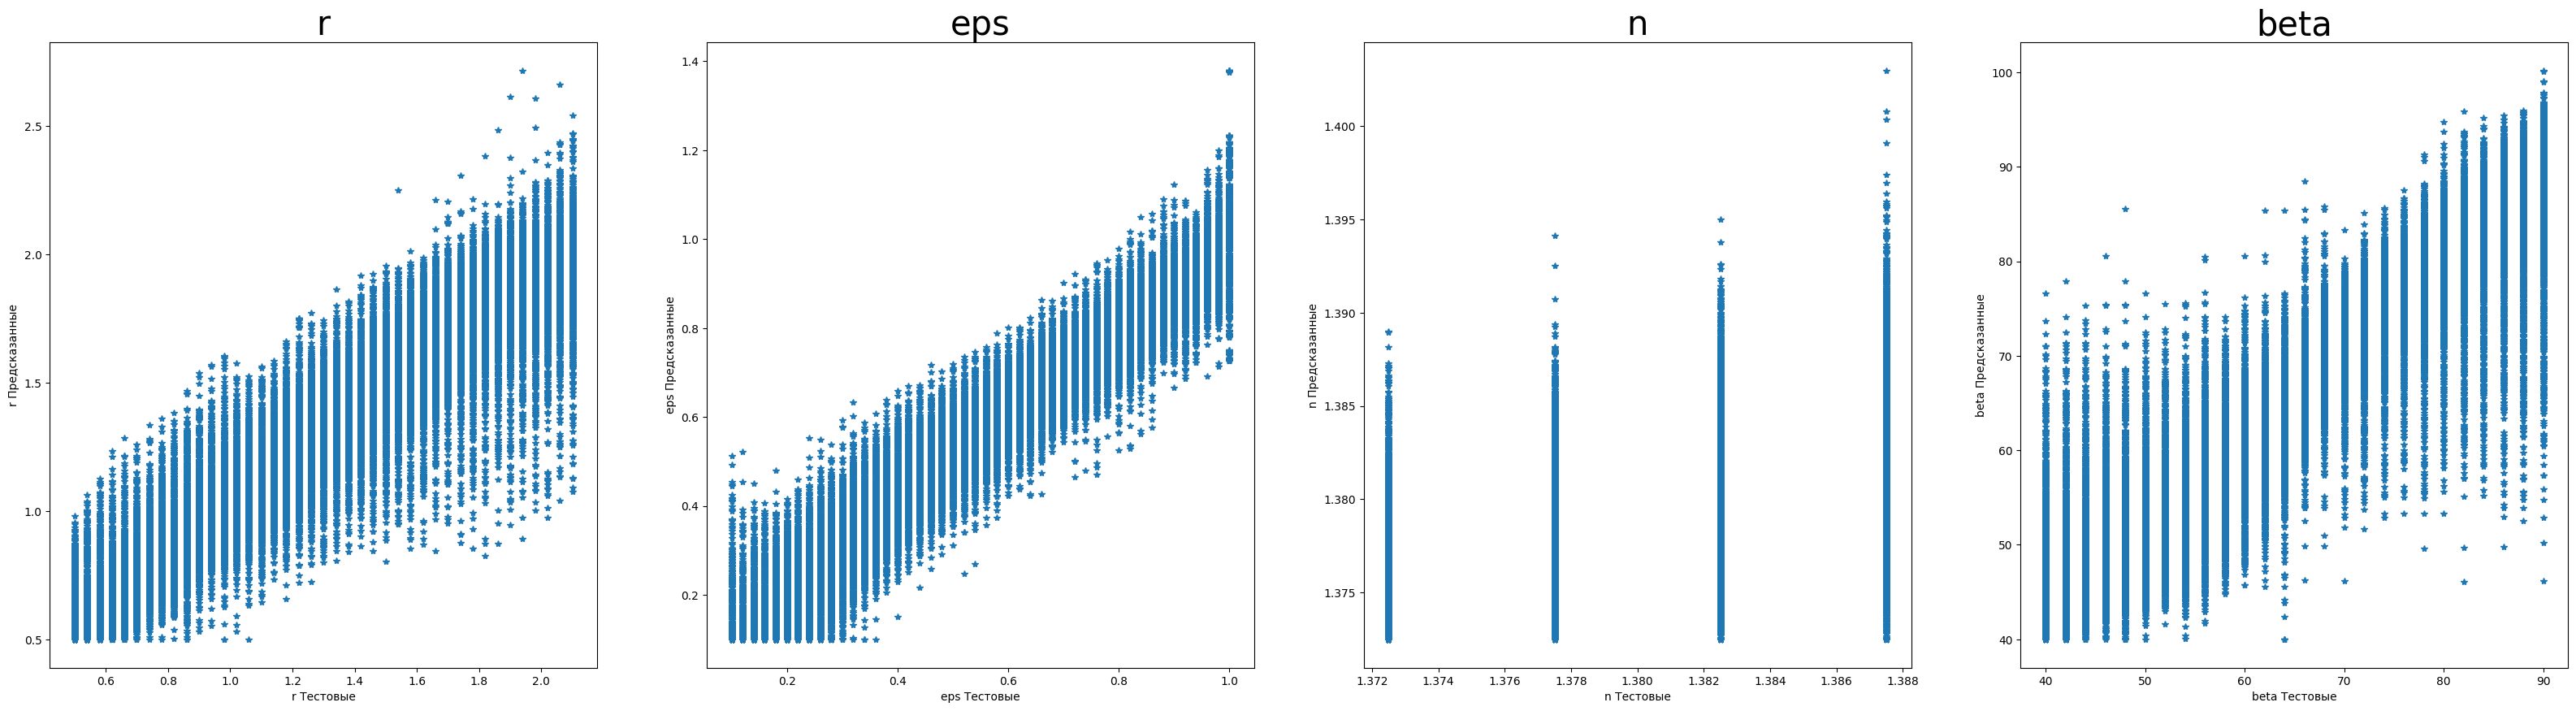

In [61]:
predict_regr_plot(Y_unscaled, preds_unscaled, ['r', 'eps', 'n', 'beta'], '')